# Vader and BERT models

Sentiment analysis in python using: 
1. VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach: \
It is older method of doing sentiment analysis. It only consider sentiments of single words(+ve or -ve) in a statment but not the relationship between words. 
2. BERT Pretrained Model from Hugging face.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('iphone13_clean_csv')
df = df.drop(0)
df = df.reset_index(drop = True)
df = df.reset_index().rename(columns = {'index':'ID'})
df.head()

,ID,product,title,rating,review,review_type
0,0,Apple iPhone 13 (128GB) - Starlight,5.0 out of 5 stars\nAbout the Product,5.0,Its was my long dream to buy an iphone and my ...,good
1,1,Apple iPhone 13 (128GB) - Starlight,5.0 out of 5 stars\nApple is the king undoubte...,5.0,"Many people says “oh I don’t like iPhones, and...",good
2,2,Apple iPhone 13 (128GB) - Starlight,5.0 out of 5 stars\nCamera quality,5.0,Image quality is awesome. All the camera lover...,good
3,3,Apple iPhone 13 (128GB) - Starlight,5.0 out of 5 stars\nABSOLUTELY 10/10,5.0,DISPLAY IS 10/10 PEAK BRIGHTNESS IS CRAZYBATTE...,good
4,4,Apple iPhone 13 (128GB) - Starlight,5.0 out of 5 stars\nMy first iPhone Experience,5.0,"It is amazing me everyday , so many practical ...",good


## VADER Seniment Scoring 
We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text. \
This uses a "bag of words" approach:
1. Stop words are removed
2. each word is scored and combined to a total score.

In [3]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
#tqdm for to show progress bars
from tqdm.notebook import tqdm

In [4]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Shreyas\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shreyas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shreyas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
vadermodel = SentimentIntensityAnalyzer()

In [8]:
#examples
vadermodel.polarity_scores('This is excellent!')

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6114}

In [9]:
example = df['review'][5].lower()
print(example)

i was a android user after several years i'm buying iphone , was very sceptical of online ordering i mean the costly items but to my surprise everything went so smooth and very happy with the order. i got best offer and very cheap also got my fav colour red. all i want to say is if you want to get it this is the best time iphone 14 not worth the price if u have older phone jst go to iphone 13 or 15 next year. amazon op


In [10]:
vadermodel.polarity_scores('example')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

__We can see that the sentiment is showing neutral though the statment is positive, this happens because Vader sentiment analysis relies on a pre-trained lexicon of words. \
Hence we need to tokenize, lemmatize the reviews to get proper sentiment__

In [11]:
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
a = set(stopwords.words('english'))

In [12]:
lema_review = []
def lemmatized_review(reviews):
    lemma = lambda x: [lemmatizer.lemmatize(i) for i in x]
    for ex in reviews:
        ls = word_tokenize(ex.lower())
        lemmatized_tokens = lemma(ls)
        stopwords = " ".join([x for x in lemmatized_tokens if x not in a])
        lema_review.append(stopwords)

In [13]:
lemmatized_review(df['review'])

In [14]:
lema_review[3:6]

["display 10/10 peak brightness crazybattery last day without issuesit take 45 minute juice 30 % 90 % till issue io 17.0.3 everything smooth lot customization like mostsound crystal clear loudcamera kind average photo night photography really sucksbut case video phone beyond comparisonthere competition iphone term videographyin hand feel nice especially designfeels premium handi got around 43k bbdfor 43k better phone thisthe ultimate allrounderi 'm highly satisfied purchase",
 'amazing everyday , many practical professional feature , awsome display , 20 % brightness enough indoor activity , smoothness ui next level experience , fluid like experience make praise every , feel hand premium , feel true valuethe battery backup phenomenal , normal usage , cover upto 1-1.5 day easily 100 % charge , maybe , depends casual usagethe camera world , colour accuracy point , completely true natural , totally get colour saw wa taking , skin tone accurate selfies , compact size make slide palm hand.so

In [15]:
df['lemmatized_review'] = lema_review
df.head()

,ID,product,title,rating,review,review_type,lemmatized_review
0,0,Apple iPhone 13 (128GB) - Starlight,5.0 out of 5 stars\nAbout the Product,5.0,Its was my long dream to buy an iphone and my ...,good,wa long dream buy iphone dream come true great...
1,1,Apple iPhone 13 (128GB) - Starlight,5.0 out of 5 stars\nApple is the king undoubte...,5.0,"Many people says “oh I don’t like iPhones, and...",good,"many people say “ oh ’ like iphones , android ..."
2,2,Apple iPhone 13 (128GB) - Starlight,5.0 out of 5 stars\nCamera quality,5.0,Image quality is awesome. All the camera lover...,good,image quality awesome . camera lover gon na lo...
3,3,Apple iPhone 13 (128GB) - Starlight,5.0 out of 5 stars\nABSOLUTELY 10/10,5.0,DISPLAY IS 10/10 PEAK BRIGHTNESS IS CRAZYBATTE...,good,display 10/10 peak brightness crazybattery las...
4,4,Apple iPhone 13 (128GB) - Starlight,5.0 out of 5 stars\nMy first iPhone Experience,5.0,"It is amazing me everyday , so many practical ...",good,"amazing everyday , many practical professional..."


In [16]:
df.loc[0,'lemmatized_review']

'wa long dream buy iphone dream come true great indian sale amazone . frankly wa littile bit nervousness beacasuse spending much money online platform .but wa gone product delivered . thanks amazon giving opportunity purchase affordable price . device wa genuine one working perfectly got update io 17.0.3 wa issue device . product delivered 4 th daythank amazon'

In [17]:
df.loc[0,'review_type']

'good'

In [18]:
vadermodel.polarity_scores(df.loc[0,'lemmatized_review'])

{'neg': 0.022, 'neu': 0.587, 'pos': 0.391, 'compound': 0.9761}

we can see that the compound score is 0.97, showing that the statement is positive

In [19]:
# lets run the vader model on entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['lemmatized_review']
    myid = row['ID']
    res[myid] = vadermodel.polarity_scores(text)

  0%|          | 0/428 [00:00<?, ?it/s]

In [20]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'ID'})
vaders = vaders.merge(df, how='left')
vaders.head()

,ID,neg,neu,pos,compound,product,title,rating,review,review_type,lemmatized_review
0,0,0.022,0.587,0.391,0.9761,Apple iPhone 13 (128GB) - Starlight,5.0 out of 5 stars\nAbout the Product,5.0,Its was my long dream to buy an iphone and my ...,good,wa long dream buy iphone dream come true great...
1,1,0.076,0.594,0.330,0.9403,Apple iPhone 13 (128GB) - Starlight,5.0 out of 5 stars\nApple is the king undoubte...,5.0,"Many people says “oh I don’t like iPhones, and...",good,"many people say “ oh ’ like iphones , android ..."
2,2,0.000,0.536,0.464,0.9880,Apple iPhone 13 (128GB) - Starlight,5.0 out of 5 stars\nCamera quality,5.0,Image quality is awesome. All the camera lover...,good,image quality awesome . camera lover gon na lo...
3,3,0.000,0.712,0.288,0.9686,Apple iPhone 13 (128GB) - Starlight,5.0 out of 5 stars\nABSOLUTELY 10/10,5.0,DISPLAY IS 10/10 PEAK BRIGHTNESS IS CRAZYBATTE...,good,display 10/10 peak brightness crazybattery las...
4,4,0.000,0.624,0.376,0.9905,Apple iPhone 13 (128GB) - Starlight,5.0 out of 5 stars\nMy first iPhone Experience,5.0,"It is amazing me everyday , so many practical ...",good,"amazing everyday , many practical professional..."


__Plot VADER results__

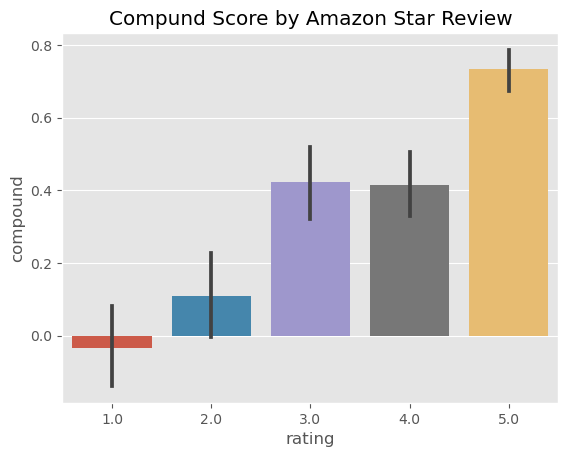

In [21]:
ax = sns.barplot(data=vaders, x='rating', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

We can see that 5 star ratings have compound score closer to 1 and 1 star rating have the compound score in the -ve. But most ratings have +ve rating implying the reviews are good for most part for the product

## BERT Pretrained Model
This is a model from Hugging face which is pretrained from a large corpus of data. \
This transformer model makes sure that the relationship between words is also considered for sentiment analysis.

In [22]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
from scipy.special import softmax

compare the example df.loc[0,'lemmatized_review'] with vader model and BERT model first

In [23]:
vadermodel.polarity_scores(df.loc[0,'lemmatized_review'])

{'neg': 0.022, 'neu': 0.587, 'pos': 0.391, 'compound': 0.9761}

In [24]:
# import the tokenizer and the model form huggingface bert-base-uncased
#each of these models has its own specific tokenizers
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertModel.from_pretrained("bert-base-uncased")

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [25]:
text = df.loc[0,'lemmatized_review']
encoded_input = tokenizer(text, return_tensors='tf')
output = model(**encoded_input)
scores = output[0][0].numpy()
#scores = softmax(scores)
# Calculate softmax using TensorFlow
scores = tf.nn.softmax(scores).numpy()
avg_bert_neg = scores[0].argmax(),
avg_bert_neu = scores[1].argmax(),
avg_bert_pos = scores[2].argmax()

# Ensure the sum of average probabilities is 1
sum_avg = avg_bert_neg + avg_bert_neu + avg_bert_pos
avg_bert_neg /= sum_avg
avg_bert_neu /= sum_avg
avg_bert_pos /= sum_avg


scores_dict = {
    'bert_neg' : avg_bert_neg.mean(),
    'bert_neu' : avg_bert_neu.mean(),
    'bert_pos' : avg_bert_pos.mean()
}
print(scores_dict)

{'bert_neg': 0.24987751825420718, 'bert_neu': 0.4156499206082178, 'bert_pos': 0.6740598419247638}


In [26]:
# put the above code of BERT model in a def
def polarity_scores_bert(reviews):
    encoded_input = tokenizer(reviews, return_tensors='tf')
    output = model(**encoded_input)
    scores = output[0][0].numpy()
    scores = tf.nn.softmax(scores).numpy()
    avg_bert_neg = scores[0].argmax(),
    avg_bert_neu = scores[1].argmax(),
    avg_bert_pos = scores[2].argmax()
    sum_avg = avg_bert_neg + avg_bert_neu + avg_bert_pos
    avg_bert_neg /= sum_avg
    avg_bert_neu /= sum_avg
    avg_bert_pos /= sum_avg
    scores_dict = {
    'bert_neg' : avg_bert_neg.mean(),
    'bert_neu' : avg_bert_neu.mean(),
    'bert_pos' : avg_bert_pos.mean()
    }
    return scores_dict

In [27]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['lemmatized_review']
        myid = row['ID']
        vader_result = vadermodel.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        bert_result = polarity_scores_bert(text)
        both = {**vader_result_rename, **bert_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/428 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (556 > 512). Running this sequence through the model will result in indexing errors


In [31]:
res[425]

{'vader_neg': 0.0,
 'vader_neu': 0.402,
 'vader_pos': 0.598,
 'vader_compound': 0.9169,
 'bert_neg': 0.6358438485804416,
 'bert_neu': 0.6017253981688082,
 'bert_pos': 0.381506309148265}

__425th row is 1star, bert model gives bert_neg higher value showing -ve review. This is the case with most of the reviews__

In [32]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'ID'})
results_df = results_df.merge(df, how='left')
results_df.head(10)

,ID,vader_neg,vader_neu,vader_pos,vader_compound,bert_neg,bert_neu,bert_pos,product,title,rating,review,review_type,lemmatized_review
0,0,0.022,0.587,0.391,0.9761,0.249878,0.415650,0.674060,Apple iPhone 13 (128GB) - Starlight,5.0 out of 5 stars\nAbout the Product,5.0,Its was my long dream to buy an iphone and my ...,good,wa long dream buy iphone dream come true great...
1,1,0.076,0.594,0.330,0.9403,0.310972,0.351929,0.668969,Apple iPhone 13 (128GB) - Starlight,5.0 out of 5 stars\nApple is the king undoubte...,5.0,"Many people says “oh I don’t like iPhones, and...",good,"many people say “ oh ’ like iphones , android ..."
2,2,0.000,0.536,0.464,0.9880,0.729167,0.437500,0.437500,Apple iPhone 13 (128GB) - Starlight,5.0 out of 5 stars\nCamera quality,5.0,Image quality is awesome. All the camera lover...,good,image quality awesome . camera lover gon na lo...
3,3,0.000,0.712,0.288,0.9686,0.269167,0.774675,0.538333,Apple iPhone 13 (128GB) - Starlight,5.0 out of 5 stars\nABSOLUTELY 10/10,5.0,DISPLAY IS 10/10 PEAK BRIGHTNESS IS CRAZYBATTE...,good,display 10/10 peak brightness crazybattery las...
4,4,0.000,0.624,0.376,0.9905,0.216509,0.747748,0.584046,Apple iPhone 13 (128GB) - Starlight,5.0 out of 5 stars\nMy first iPhone Experience,5.0,"It is amazing me everyday , so many practical ...",good,"amazing everyday , many practical professional..."
5,5,0.054,0.597,0.349,0.9571,0.625000,0.625000,0.375000,Apple iPhone 13 (128GB) - Starlight,5.0 out of 5 stars\nBEST VALUE FOR MONEY Got f...,5.0,I was a Android user after several years I'm b...,good,wa android user several year 'm buying iphone ...
6,6,0.069,0.632,0.299,0.9578,0.260054,0.938730,0.504885,Apple iPhone 13 (128GB) - Starlight,5.0 out of 5 stars\nIt’s too Good as expected,5.0,"Hi all, I am here to write some thing new, I ...",good,"hi , write thing new , brought new phone 13 15..."
7,7,0.065,0.664,0.271,0.9665,0.499819,1.436066,0.216995,Apple iPhone 13 (128GB) - Starlight,5.0 out of 5 stars\nTitle: Pleasantly Surprise...,5.0,I recently purchased the iPhone 13 from Amazon...,good,"recently purchased iphone 13 amazon must say ,..."
8,8,0.020,0.555,0.425,0.9833,0.349742,0.209845,0.725075,Apple iPhone 13 (128GB) - Starlight,5.0 out of 5 stars\nThanks to Amazon...,5.0,The iPhone 13 impresses with its vibrant displ...,good,"iphone 13 impress vibrant display , making col..."
9,9,0.000,0.661,0.339,0.9545,0.321764,1.002963,0.442622,Apple iPhone 13 (128GB) - Starlight,5.0 out of 5 stars\nphone exceeded the expecta...,5.0,In simple languagethis is not just the best va...,good,simple languagethis best value money iphone ma...


C:\Users\Shreyas\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


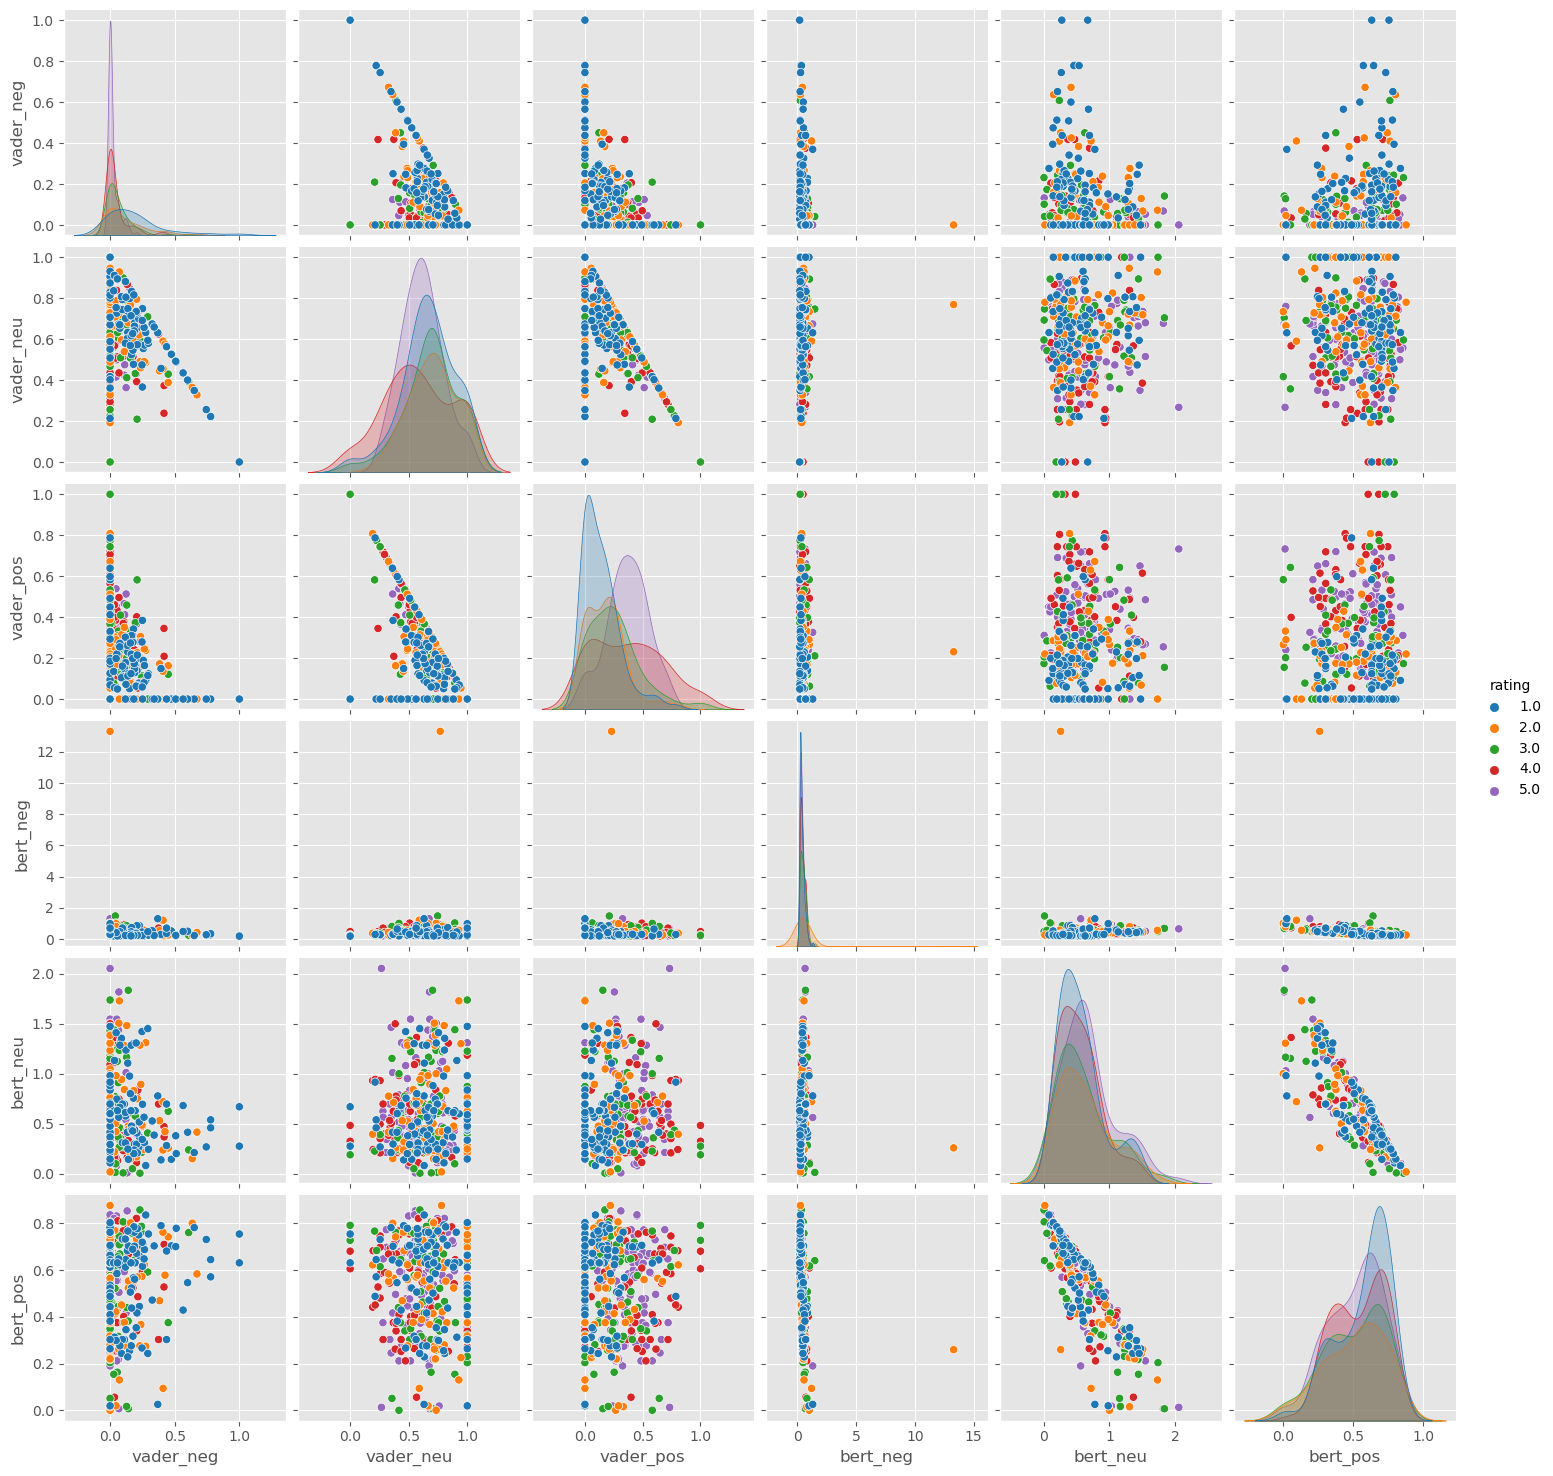

In [33]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'bert_neg', 'bert_neu', 'bert_pos'],
            hue='rating',
            palette='tab10')
plt.show()

we can check bert_neg vs bert_neg, \
bert_pos vs bert_pos, \
bert_neg vs bert_neg, the bert model correctly  separates the +ve,neutral and -ve. \
vader_model is not as confident as bert_model